In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [2]:
insurance_data = pd.read_csv('data-insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
insurance_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
insurance_data.shape

(1338, 7)

In [7]:
insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 1000x600 with 0 Axes>

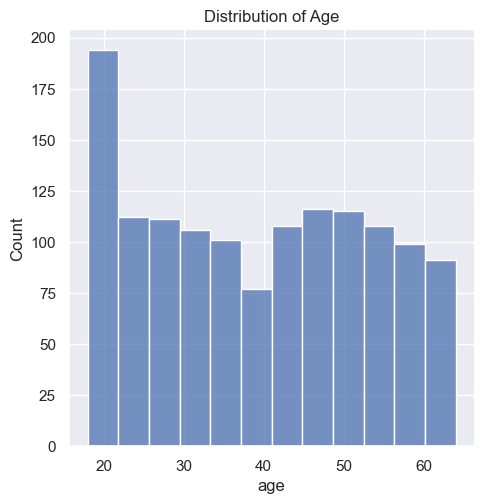

In [8]:
# Data distribution for numerical column age
sns.set()
plt.figure(figsize=(10, 6))
sns.displot(insurance_data['age'])
plt.title('Distribution of Age')
plt.show()

In [9]:
insurance_data['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

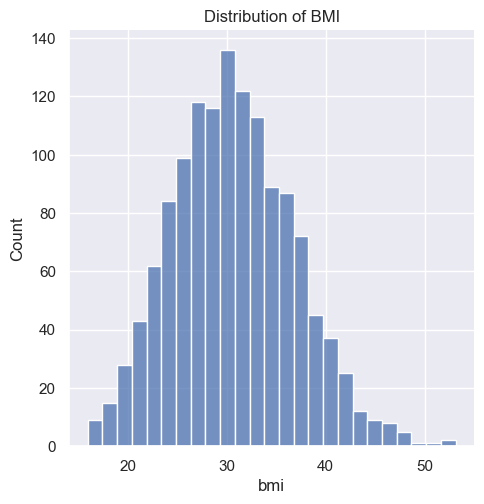

In [10]:
# Data distribution for numerical column age
sns.set()
plt.figure(figsize=(10, 6))
sns.displot(insurance_data['bmi'])
plt.title('Distribution of BMI')
plt.show()

<Figure size 1000x600 with 0 Axes>

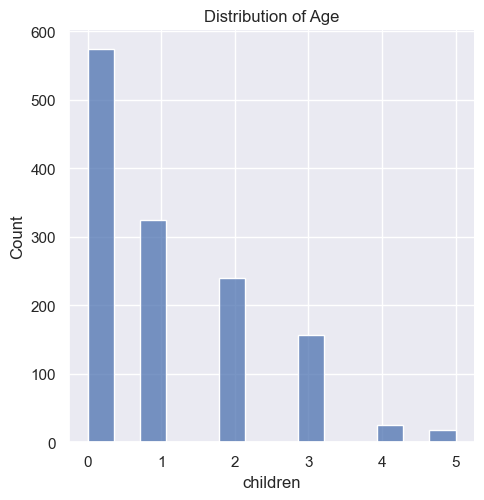

In [11]:
# Data distribution for numerical column age
sns.set()
plt.figure(figsize=(10, 6))
sns.displot(insurance_data['children'])
plt.title('Distribution of Age')
plt.show()

<Figure size 1000x600 with 0 Axes>

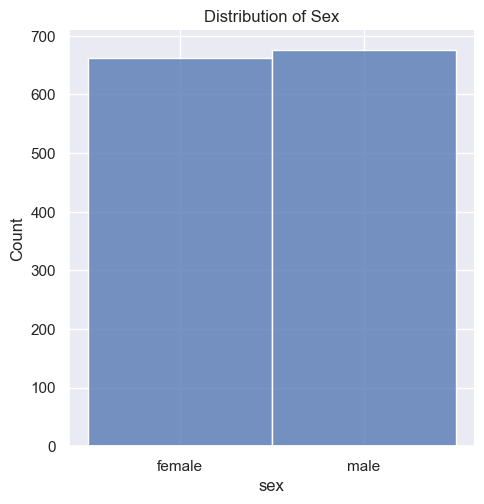

In [16]:
# Column charts for categorical column - sex
sns.set()
plt.figure(figsize=(10, 6))
sns.displot(x=insurance_data['sex'], data=insurance_data)
plt.title('Distribution of Sex')
plt.show()

In [14]:
insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

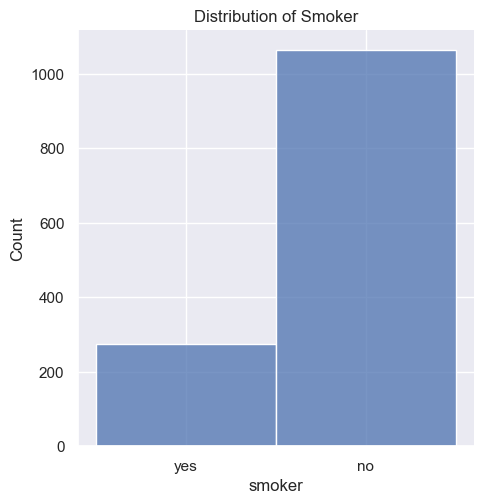

In [17]:
# Column charts for categorical column - smoker
sns.set()
plt.figure(figsize=(10, 6))
sns.displot(x=insurance_data['smoker'], data=insurance_data)
plt.title('Distribution of Smoker')
plt.show()

<Figure size 1000x600 with 0 Axes>

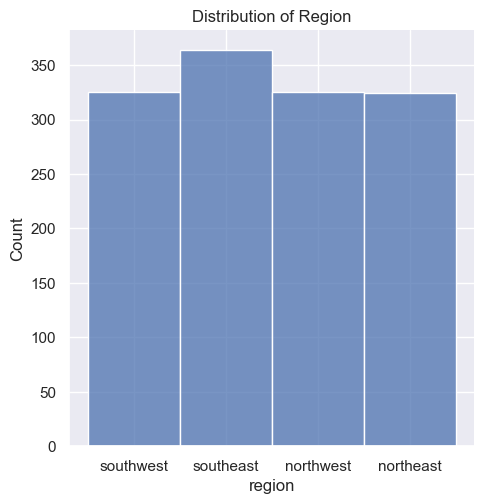

In [18]:
# Column charts for categorical column - region
sns.set()
plt.figure(figsize=(10, 6))
sns.displot(x=insurance_data['region'], data=insurance_data)
plt.title('Distribution of Region')
plt.show()

In [19]:
insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [20]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
# Converting categorical variables into numerical
insurance_data['sex'] = insurance_data['sex'].apply(lambda x: 0 if x =='female' else 1)
insurance_data['smoker'] = insurance_data['smoker'].apply(lambda x: 0 if x =='no' else 1)

# Label encoding for region
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
insurance_data['region'] = le.fit_transform(insurance_data['region'])

insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,1,31.920,0,0,0,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [26]:
# Splitting the data into features (X) and target variable (y)
x = insurance_data.drop('charges', axis=1)
y = insurance_data['charges']

# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [31]:
print('Input data shape:', x.shape)
print('\nInput training datea:', x_train.shape)
print('\nInput test datea:', x_test.shape)

Input data shape: (1338, 6)

Input training datea: (1070, 6)

Input test datea: (268, 6)


In [32]:
print('Output data shape:', y.shape)
print('\nOutput training datea:', y_train.shape)
print('\nOutput test datea:', y_test.shape)

Output data shape: (1338,)

Output training datea: (1070,)

Output test datea: (268,)


In [33]:
# Model creation

model = RandomForestRegressor(n_estimators=100, max_depth=7)

In [34]:
# Train the model
model.fit(x_train, y_train)

RandomForestRegressor(max_depth=7)

In [35]:
#predicting values with test data

test_data_pred = model.predict(x_test)

In [36]:
test_data_pred

array([10308.51239194,  5635.88254763, 27718.09032326,  9982.46000695,
       34620.70989681,  6856.53867641,  1850.21149373, 14130.61337093,
        6445.55965487, 10863.19943628, 19571.34474044,  7556.99908022,
        4757.16933032, 45677.11978838, 47776.44773467, 44760.62991463,
        9909.30979467, 42790.82144529,  9716.80237336, 24730.58066535,
        5413.50065989,  9230.86029288,  2436.45705759,  3434.4875317 ,
       11795.65557297, 12531.77767024, 13395.32282009,  6427.45539104,
       10874.93187351,  4707.63081963,  7514.26349791, 12544.80146991,
        2841.01878506,  5934.27170282,  4223.71805596, 11336.71968924,
        2813.46152583,  8249.10154232, 23919.40391346, 39832.18596287,
        5570.33006027,  4663.39237868, 13069.96850871, 14197.48931838,
        6153.05697652, 16180.37318961, 12556.83471022,  5144.21285506,
       41749.14135912,  5622.07145963, 13764.56468062,  2600.82415966,
        6983.06841341,  2131.87314055, 12233.32965415, 11259.13221922,
      

In [37]:
# Evaluating the model
from sklearn.metrics import r2_score

In [38]:
r2_score(y_test, test_data_pred)

0.8769922184885199

In [56]:
input_data = (65, 1, 19, 1, 0, 0)
input_data_array = np.array(input_data)
input_data_array = input_data_array.reshape(1, -1)

In [57]:
insurance_premium = model.predict(input_data_array)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [58]:
insurance_premium[0]

21100.962688177697

In [59]:
import pickle as pkl

In [61]:
pkl.dump(model, open('model.pkl', 'wb'))